# Plotting Techniques

- matplotlib : common plotting library for 2D plots

In this workshop we will see: 
    - Image plots
    - Linear plots
    - Scatter plots
    - Bar plots
as well as:
    - modifying axis
    - adding subplots
    - adding colorbars
    - plotting multiple 'linear' plots on the same figure
    - 'fancy' scatter plots
    - adjusting figure size
    - saving plots to files

# Image plot


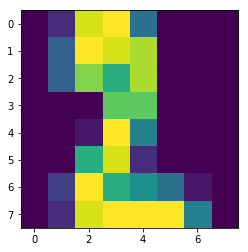

In [2]:
import matplotlib.pyplot as plt
from sklearn import datasets

MNIST = datasets.load_digits()

digit = MNIST.images[132]

plt.imshow(digit)
plt.show()

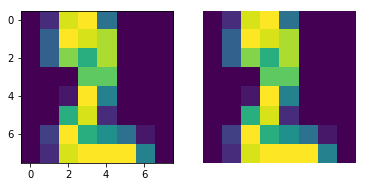

In [3]:
plt.subplot(121)
plt.imshow(digit)
plt.subplot(122)
plt.imshow(digit)
plt.axis('off')
plt.show()

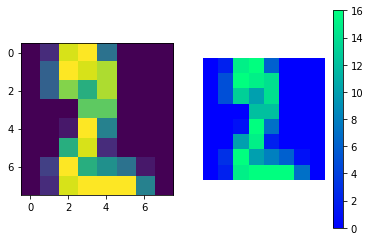

In [4]:
plt.subplot(121)
plt.imshow(digit)
plt.subplot(122)
plt.imshow(digit,cmap='winter')
plt.colorbar()
plt.axis('off')
plt.show()

# Linear Plot

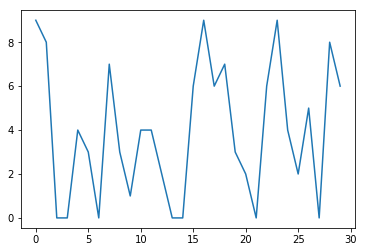

In [5]:
import numpy as np

X = range(0,30)
random_Y = np.random.randint(0,10,30)

plt.plot(X,random_Y)
plt.show()

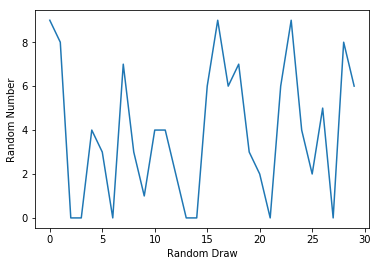

In [6]:
plt.plot(X,random_Y)
plt.xlabel('Random Draw')
plt.ylabel('Random Number')
plt.show()

# Scatter plot

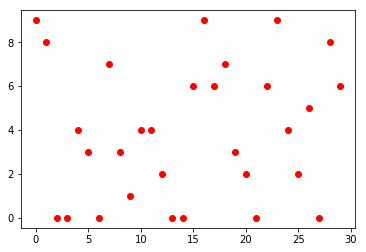

In [7]:
plt.plot(X,random_Y,'ro')
plt.show()

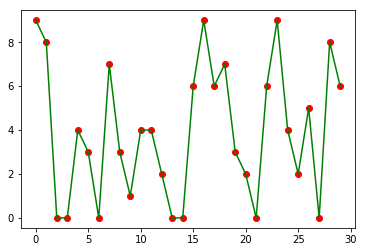

In [8]:
plt.plot(X,random_Y,'ro',X,random_Y,'g')
plt.show()

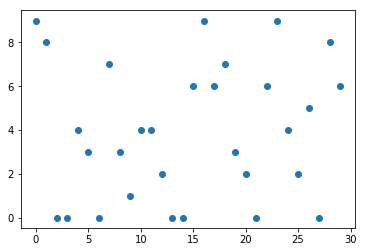

In [9]:
plt.scatter(X,random_Y)
plt.show()

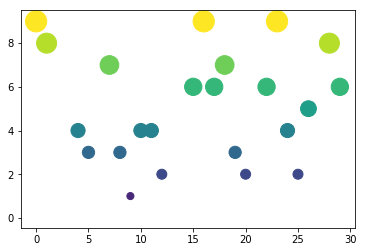

In [10]:
plt.scatter(X,random_Y,c=random_Y,s=50*random_Y)
plt.show()

# Bar Plot

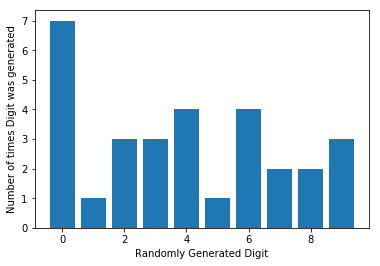

In [11]:
bins = range(0,10)
values = np.zeros(10)
for num in random_Y:
    values[num] += 1

plt.bar(bins,values)
plt.xlabel('Randomly Generated Digit')
plt.ylabel('Number of times Digit was generated')
plt.show()

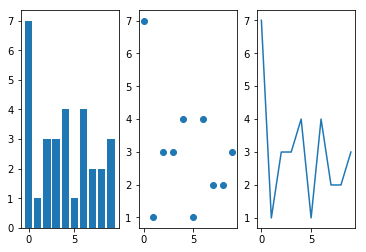

In [12]:
fig, ax = plt.subplots(1,3)
ax[0].bar(bins,values)
ax[1].scatter(bins,values)
ax[2].plot(bins,values)
plt.show()

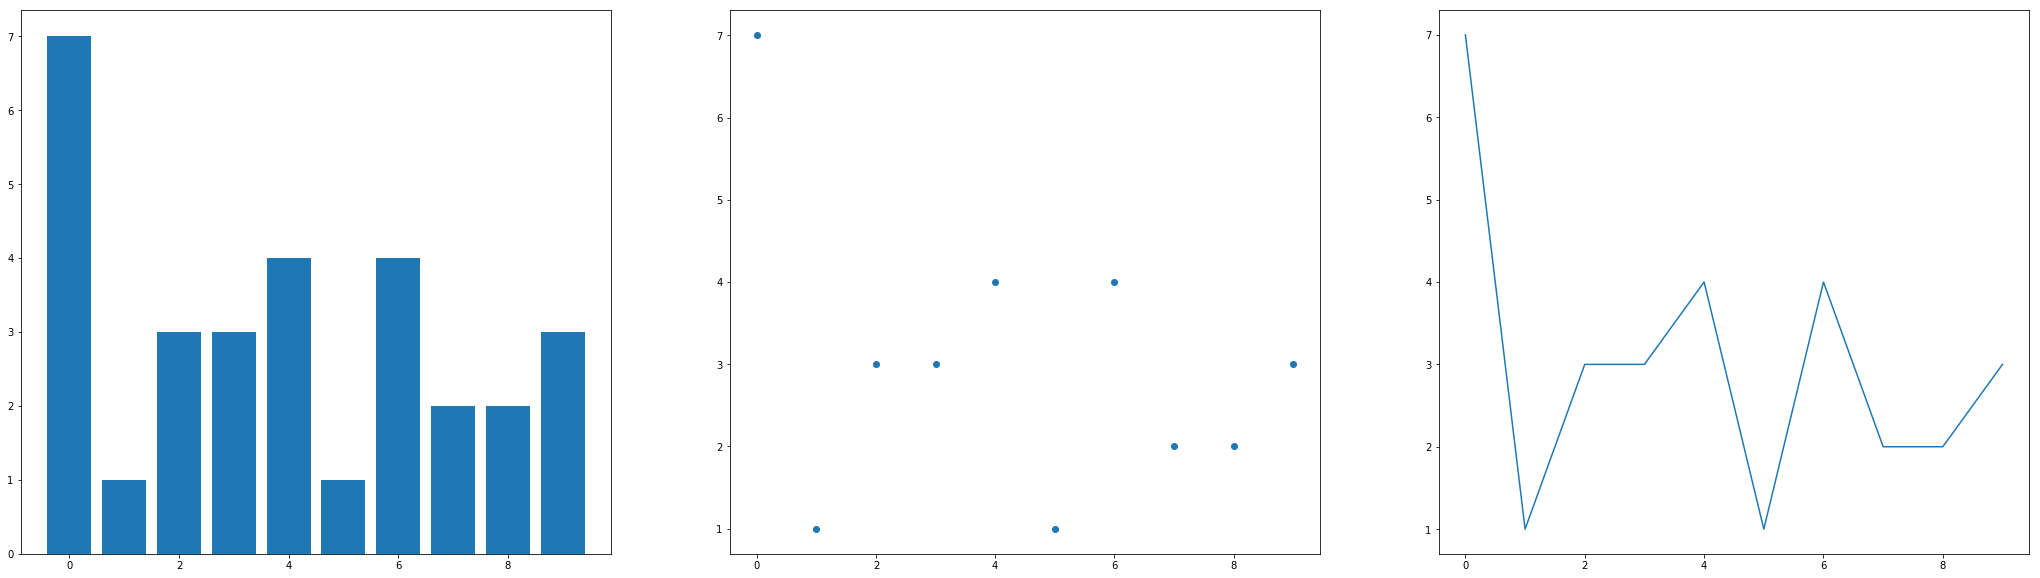

In [13]:
fig, ax = plt.subplots(1,3,figsize=(36,10))
ax[0].bar(bins,values)
ax[1].scatter(bins,values)
ax[2].plot(bins,values)
plt.savefig('figurename.png', bbox_inches='tight')
plt.show()


# Scipy

Open source collection of libraries related to data science in python... includes a scipy library
- scipy library: has numerical computing functions for 
    - numerical integration
    - signal processing
    - probability and random number generating
    - image processing
    

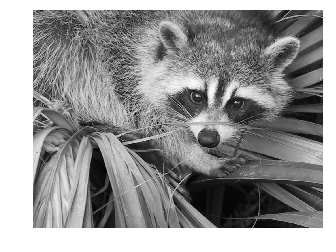

In [17]:
from scipy import misc
from scipy import ndimage

raccoon = misc.face(gray=True).astype('float')
plt.imshow(raccoon, cmap='gray')
plt.axis('off')
plt.show()

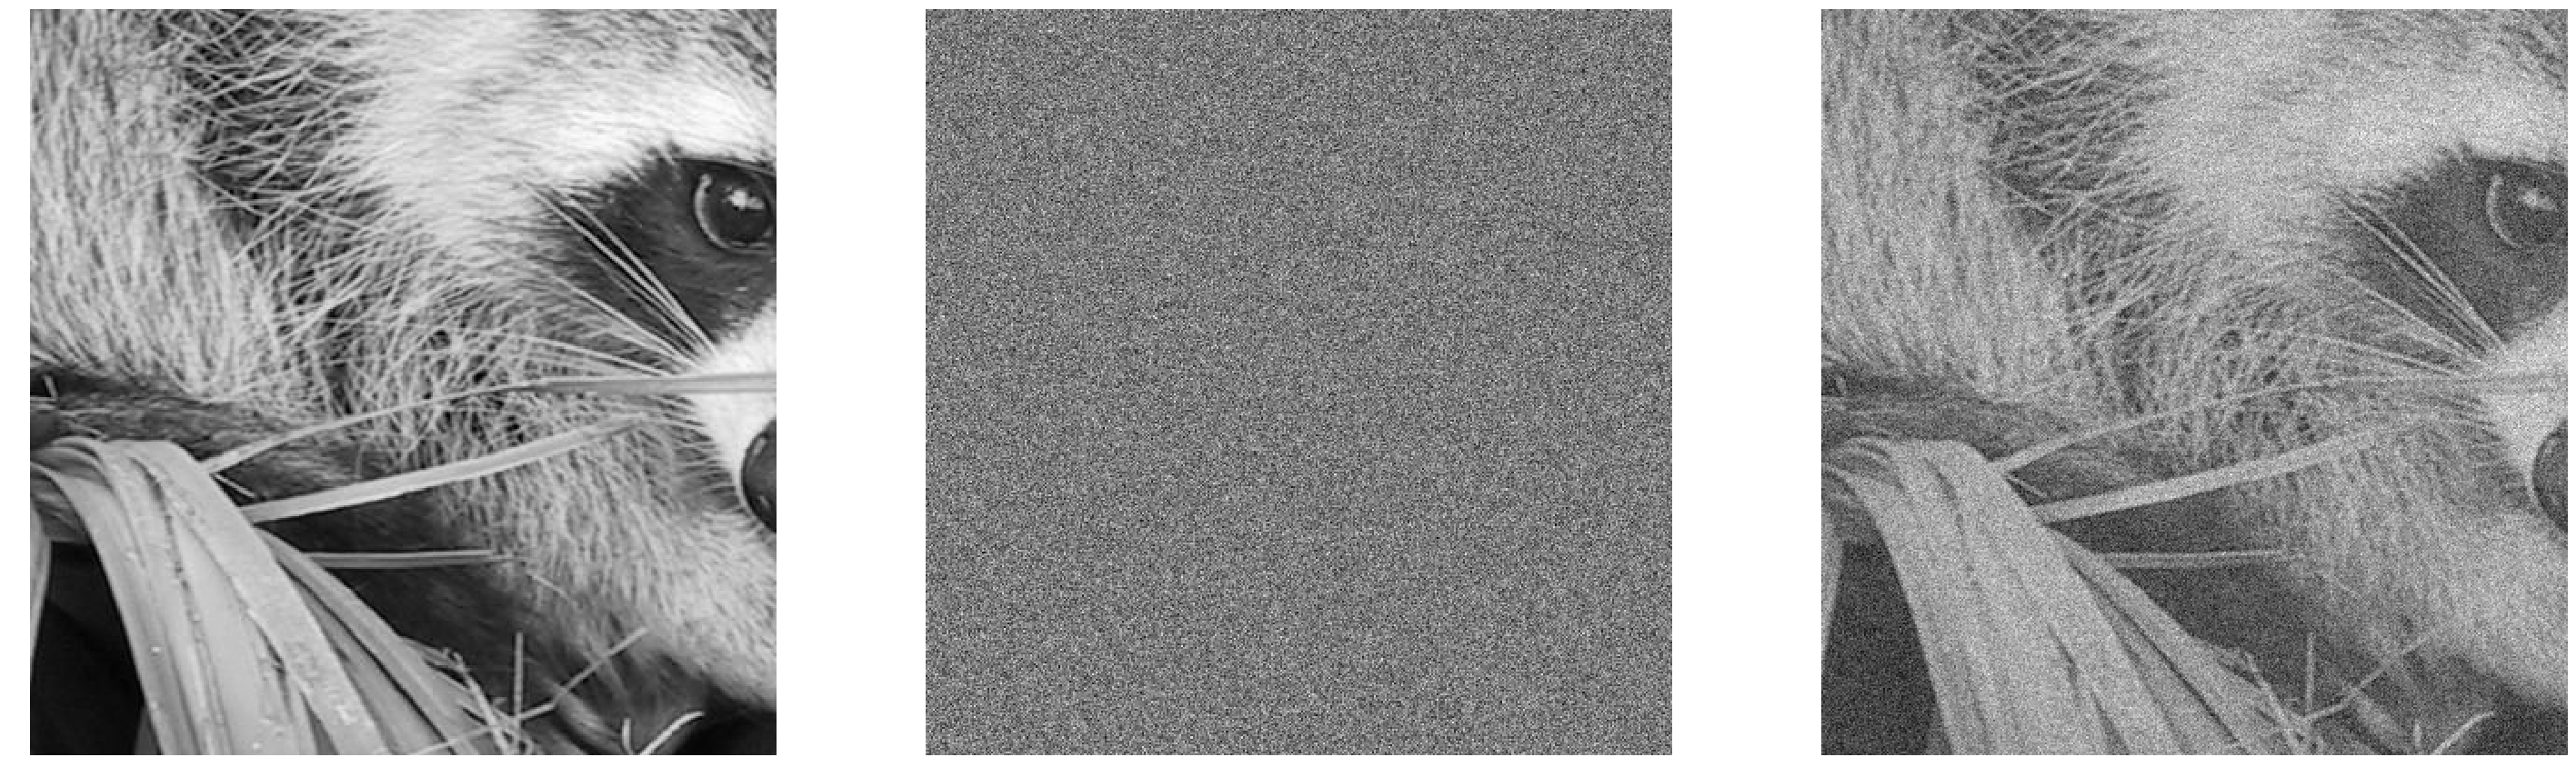

In [18]:
# add some Gaussian noise

noise = np.random.normal(0,1,raccoon.shape)

noisy_raccoon = raccoon + 30*noise

fig,ax = plt.subplots(1,3,figsize=(50,40))
ax[0].imshow(raccoon[200:600,200:600],cmap='gray')
ax[0].axis('off')
ax[1].imshow(noise[200:600,200:600],cmap='gray')
ax[1].axis('off')
ax[2].imshow(noisy_raccoon[200:600,200:600],cmap='gray')
ax[2].axis('off')
plt.show()

# Tasks

## Image processing:

    - Denoise noisy_raccoon by applying a Gaussian filter (hint: try ndimage.gaussian_filter)
    - Binarize the image by setting values to zero if they are less than the mean, 255 if they are more
    - Perform edge detection on the binary image 
        - use ndimage.sobel in both axial directions
        - use np.hypot to stitch the edges together

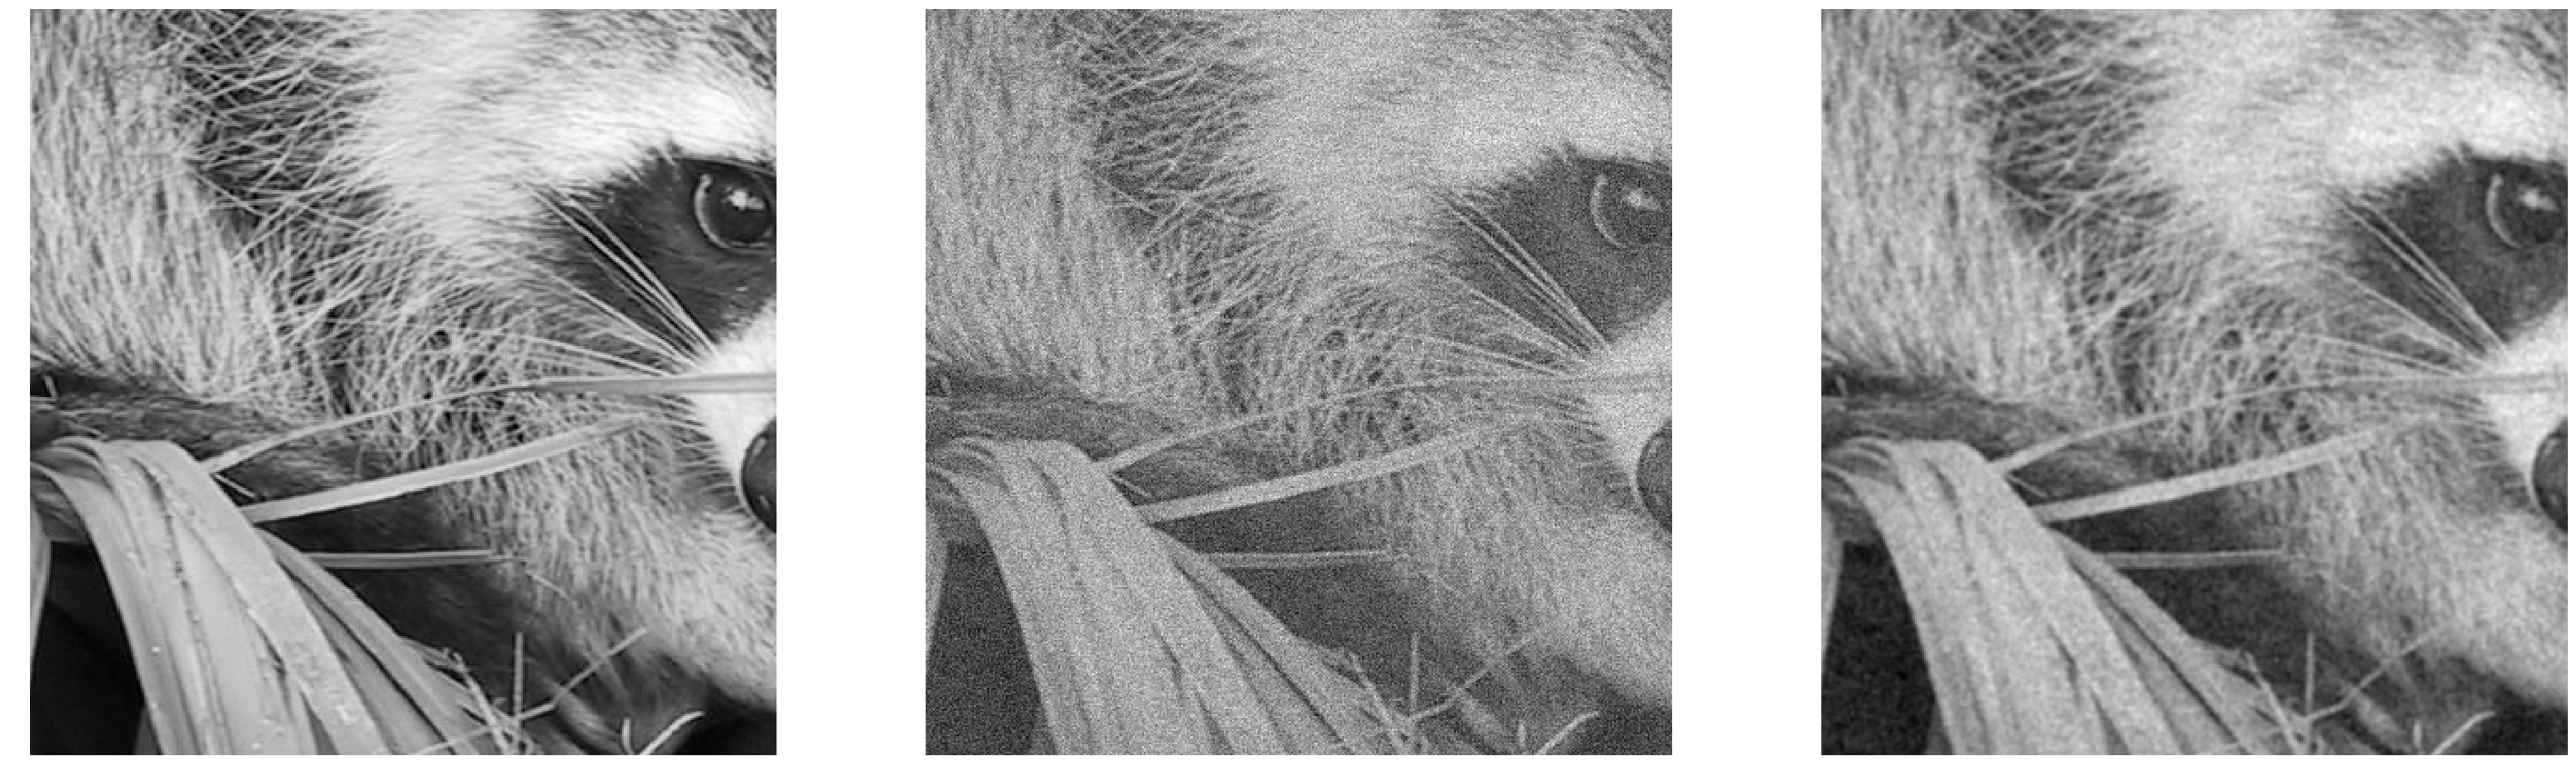

In [50]:
denoisy_raccoon = ndimage.gaussian_filter(noisy_raccoon,1)

fig,ax = plt.subplots(1,3,figsize=(50,40))
ax[0].imshow(raccoon[200:600,200:600],cmap='gray')
ax[0].axis('off')
ax[1].imshow(noisy_raccoon[200:600,200:600],cmap='gray')
ax[1].axis('off')
ax[2].imshow(denoisy_raccoon[200:600,200:600],cmap='gray')
ax[2].axis('off')
plt.show()

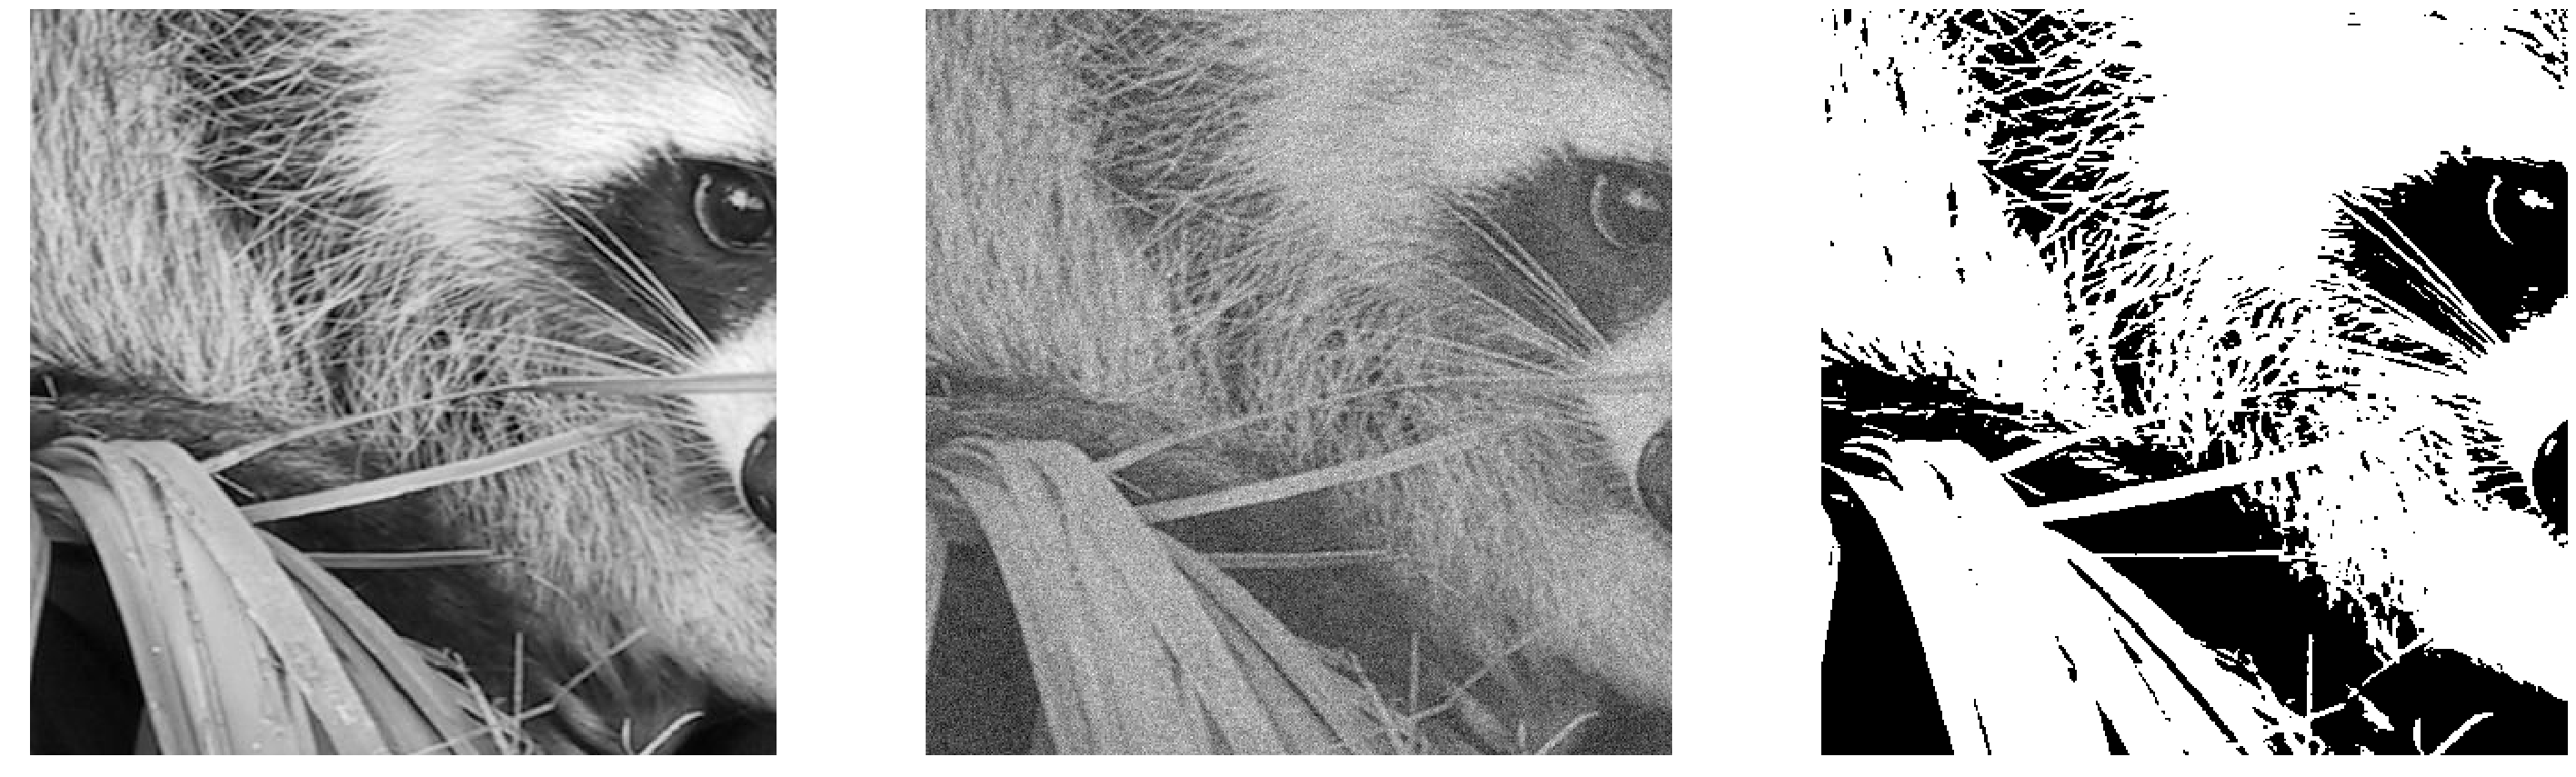

In [38]:
nr_mean = np.mean(noisy_raccoon)
binary_raccoon = np.zeros(raccoon.shape)
for i in range(raccoon.shape[0]):
    for j in range(raccoon.shape[1]):
        if raccoon[i,j] > nr_mean:
            binary_raccoon[i,j] = 1
            
fig,ax = plt.subplots(1,3,figsize=(50,40))
ax[0].imshow(raccoon[200:600,200:600],cmap='gray')
ax[0].axis('off')
ax[1].imshow(noisy_raccoon[200:600,200:600],cmap='gray')
ax[1].axis('off')
ax[2].imshow(binary_raccoon[200:600,200:600],cmap='gray')
ax[2].axis('off')
plt.show()

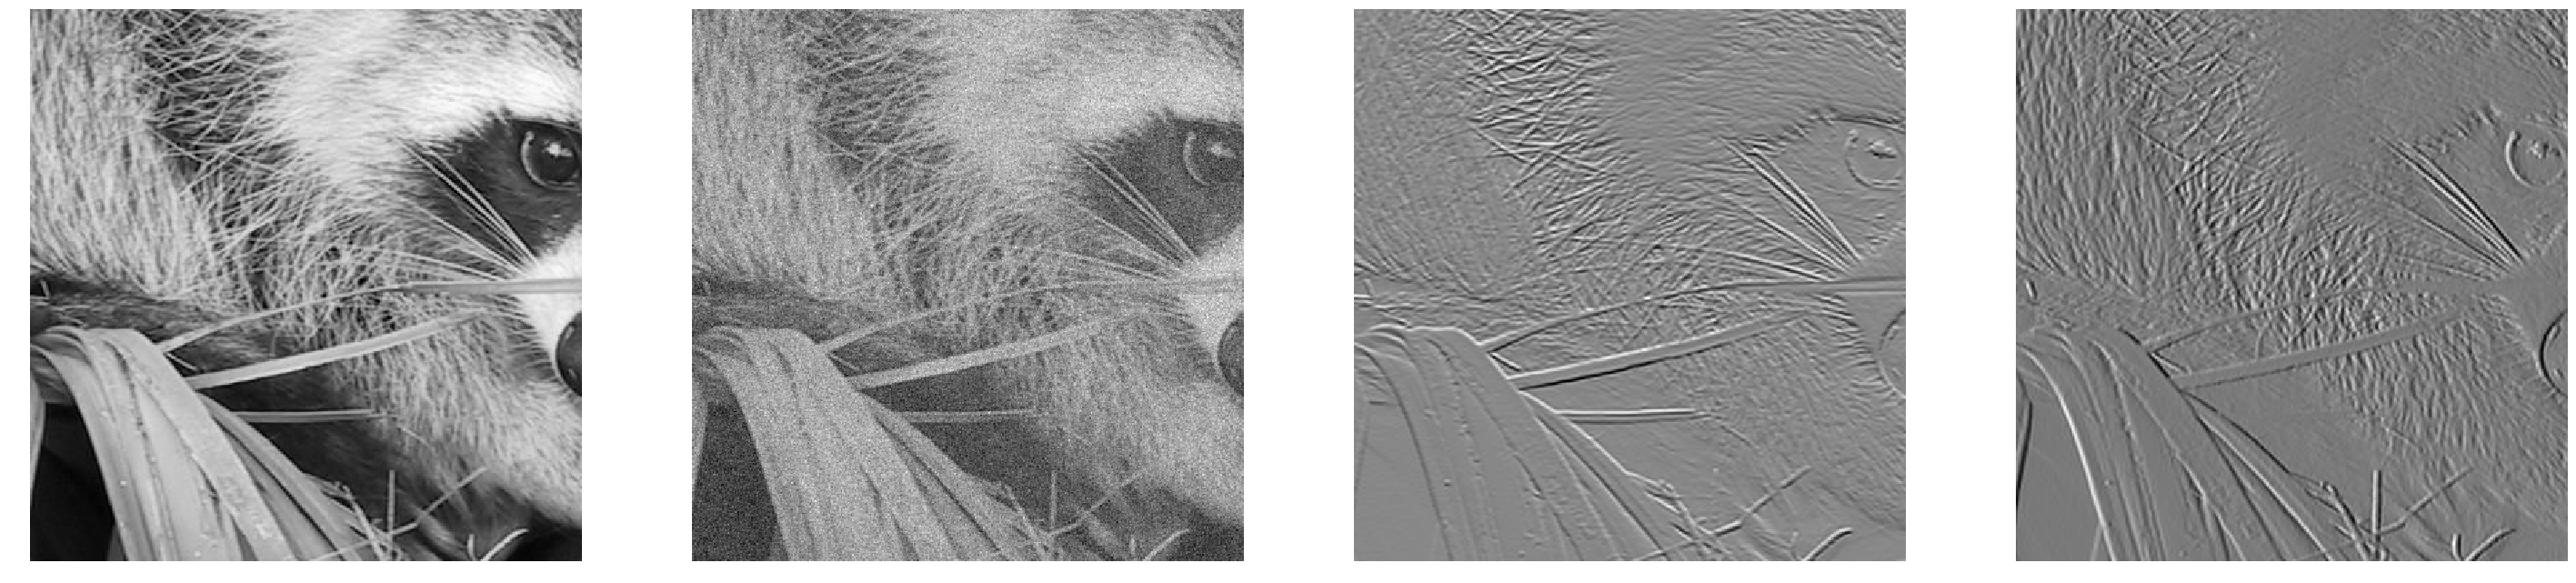

In [46]:
edge_x_raccoon = ndimage.sobel(raccoon,0)
edge_y_raccoon = ndimage.sobel(raccoon,1)

fig,ax = plt.subplots(1,4,figsize=(50,40))
ax[0].imshow(raccoon[200:600,200:600],cmap='gray')
ax[0].axis('off')
ax[1].imshow(noisy_raccoon[200:600,200:600],cmap='gray')
ax[1].axis('off')
ax[2].imshow(edge_x_raccoon[200:600,200:600],cmap='gray')
ax[2].axis('off')
ax[3].imshow(edge_y_raccoon[200:600,200:600],cmap='gray')
ax[3].axis('off')
plt.show()

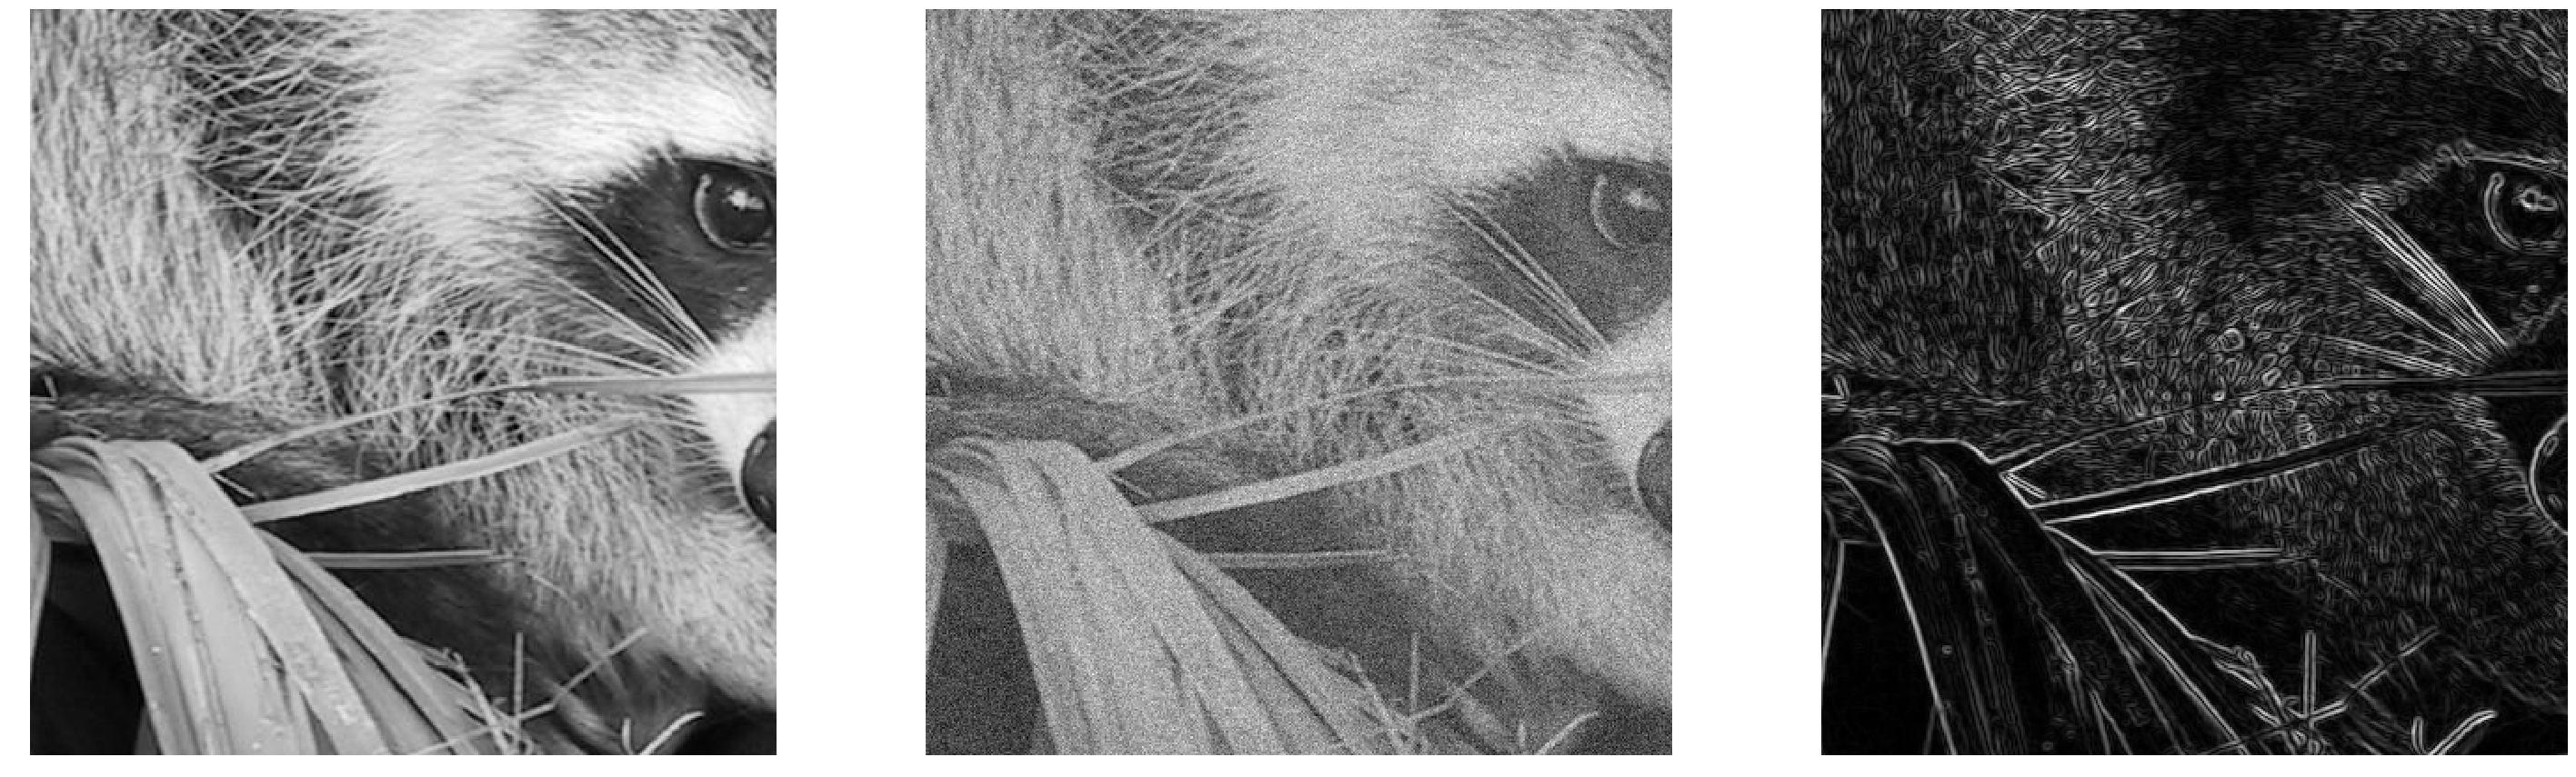

In [47]:
edge_xy_raccoon = np.hypot(edge_x_raccoon,edge_y_raccoon)

fig,ax = plt.subplots(1,3,figsize=(50,40))
ax[0].imshow(raccoon[200:600,200:600],cmap='gray')
ax[0].axis('off')
ax[1].imshow(noisy_raccoon[200:600,200:600],cmap='gray')
ax[1].axis('off')
ax[2].imshow(edge_xy_raccoon[200:600,200:600],cmap='gray')
ax[2].axis('off')
plt.show()